In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:

    def __init__(self, learning_rate=0.1,iter=1000,l1=0.0, l2=0.0):
        self.learning_rate = learning_rate
        self.iter = iter
        self.costs = []
        self.l1 = l1
        self.l2 = l2

    def initialize_weights(self,length):
        self.weights = np.random.uniform(0, 1, size=length)
        self.bias = 0

    def prediction(self,X):
        return np.dot(X,self.weights) + self.bias

    def cost(self,X,y):
        length = y.shape[0]
        y_pred = self.prediction(X)
        errors = y_pred - y
        cost = (1/(2*length))*((np.sum((errors **2))))
        return cost

    def update_weights(self,X,y):
        y_pred = self.prediction(X)
        d_errors = (1/len(y)) * (y_pred - y)
        gradient = np.dot(X.T,d_errors)
        d_bias = np.sum(d_errors)

        l1_reg = self.l1 * np.sign(self.weights)
        l2_reg = self.l2 * self.weights

        self.weights -= self.learning_rate * (gradient + l1_reg + l2_reg)
        self.bias -= self.learning_rate * d_bias

    def fit(self,X,y):
        length = X.shape[1]
        self.initialize_weights(length)
        for  i in range(1,self.iter+1):
            cost = self.cost(X,y)
            self.costs.append(cost)
            self.update_weights(X, y)
            if i % 100 == 0 or i==1:
                print(f'Iteration {i}, Cost: {cost:.4f}')

    def predict(self, X_test):
        predictions = self.prediction(X_test)
        return predictions

    def evaluation(self,X,y):
        predictions = self.predict(X)
        errors = predictions - y
        MAE = np.mean(np.abs(errors))
        MSE = np.mean((errors ** 2))
        RMSE = np.sqrt(MSE)
        R2 = 1 - ((np.sum(errors ** 2)) / (np.sum((y - np.mean(y)) ** 2)))
        print(f"Mean Squared Error (MSE): {MSE}\n"
              f"Root Mean Squared Error (RMSE): {RMSE}\n"
              f"Mean Absolute Error (MAE): {MAE}\n"
              f"R2 Score: {R2}")

    def plot_cost(self):
        plt.plot(range(1, self.iter + 1),self.costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title(f"Plot Loss - Learning Rate: {self.learning_rate}")
        plt.grid(True)
        plt.show()

In [3]:
def find_categoric(dataframe, cat_th=10):
  cat = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() < cat_th]
  return cat

In [4]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dtype=int, drop_first=drop_first)
    return dataframe

In [5]:
def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

In [6]:
def outlier_thresholds(dataframe, col, low_quantile=0.10, up_quantile=0.90):
    Q1 = dataframe[col].quantile(low_quantile)
    Q3 = dataframe[col].quantile(up_quantile)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    return low_limit, up_limit

In [7]:
def check_outlier(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [8]:
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
    dataframe.loc[(dataframe[col] > up_limit), col] = up_limit

In [9]:
train_data = pd.read_csv("trainDATA.csv")
test_data = pd.read_csv("testDATA.csv")

In [10]:
train_data.shape

(3471, 8)

In [11]:
train_data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [12]:
test_data.head() # column names are wrong, we need to fix that firstly

,Hyundai Grand i10 Magna,2015,70000,Petrol,Individual,Manual,Second Owner,320000
0,Maruti Wagon R LXI BS IV,2014,50000,Petrol,Individual,Manual,First Owner,300000
1,Volkswagen CrossPolo 1.2 MPI,2016,110000,Petrol,Individual,Manual,First Owner,350000
2,Maruti Ertiga VXI Petrol,2018,50000,Petrol,Individual,Manual,First Owner,800000
3,Hyundai Xcent 1.1 CRDi S,2016,175000,Diesel,Individual,Manual,First Owner,270000
4,Hyundai i20 1.2 Magna Executive,2017,60000,Petrol,Individual,Manual,First Owner,540000


In [13]:
true_columns = ["name","year","km_driven","fuel","seller_type","transmission","owner","selling_price"]

In [14]:
new_value= pd.DataFrame({
      "name": ["Hyundai Grand i10 Magna"],
      "year": [2015],
      "km_driven": [70000],
      "fuel": ["Petrol"],
      "seller_type":["Individual"],
      "transmission": ["Manual"],
      "owner": ["Second Owner"],
      "selling_price": [320000]
  })

In [15]:
test_data.columns = true_columns

In [16]:
test_data = pd.concat([test_data, new_value],ignore_index=True)

Creating a new column named 'brand' by taking the first word of the 'name' column in the dataset

In [17]:
train_data['brand'] = train_data['name'].str.split().str[0]
test_data['brand'] = test_data['name'].str.split().str[0]

In [18]:
train_data["brand"].value_counts()

Maruti           1041
Hyundai           662
Tata              290
Mahindra          286
Honda             194
Ford              174
Toyota            165
Chevrolet         157
Renault           114
Volkswagen         87
Skoda              57
Audi               50
Nissan             45
BMW                35
Mercedes-Benz      31
Datsun             31
Fiat               24
Jaguar              6
Mitsubishi          5
Volvo               3
Land                3
Jeep                2
OpelCorsa           2
Ambassador          2
Daewoo              1
MG                  1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

encoding the 'brand' into categories

In [19]:
def brand_to_category(brand):
    lux = ["Audi", "BMW", "Mercedes-Benz", "Jaguar", "Land Rover", "Volvo"]
    middle =["Toyota", "Honda", "Ford", "Chevrolet", "Volkswagen", "Skoda",
             "Nissan", "Mitsubishi", "Subaru", "Opel", "Daewoo"]
    economy = ["Maruti", "Hyundai", "Tata", "Mahindra", "Datsun", "Fiat",
               "MG", "Force", "Isuzu", "Kia","Ambassador"]
    if brand in lux:
        return 4
    elif brand in middle:
        return 3
    elif brand in economy:
        return 2
    else:
        return 1

In [20]:
train_data['brand_category'] = train_data['brand'].apply(brand_to_category)
test_data['brand_category'] = test_data['brand'].apply(brand_to_category)

In [21]:
train_data.drop("brand",axis=1,inplace=True)
test_data.drop("brand",axis=1,inplace=True)

In [22]:
train_data["fuel"].value_counts()

Petrol    1741
Diesel    1680
CNG         29
LPG         21
Name: fuel, dtype: int64

In [23]:
test_data["fuel"].value_counts() #There is one electric vehicle in the training set, and it needs to be removed

Diesel      473
Petrol      382
CNG          11
LPG           2
Electric      1
Name: fuel, dtype: int64

In [24]:
test_data = test_data[test_data['fuel'] != 'Electric']

In [25]:
train_data["year"].nunique()

27

In [26]:
def year_to_category(year):
  if year>=2015:
    return 3
  if year>=2000 and year<2015:
    return 2
  if year<2000:
    return 1

In [27]:
train_data['year_category'] = train_data['year'].apply(year_to_category)
test_data['year_category'] = test_data['year'].apply(year_to_category)

In [28]:
train_data["age"] = (2023- train_data["year"])
test_data["age"] = (2023- test_data["year"])

train_data.drop("year",axis=1,inplace=True)
test_data.drop("year",axis=1,inplace=True)

In [29]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
km_driven,3471.0,64971.295592,45593.733333,1.0,32038.5,59385.0,90000.0,806599.0
selling_price,3471.0,503656.284932,580470.196756,20000.0,200000.0,350000.0,600000.0,8150000.0
brand_category,3471.0,2.292135,0.590456,1.0,2.0,2.0,3.0,4.0
year_category,3471.0,2.418611,0.506089,1.0,2.0,2.0,3.0,3.0
age,3471.0,9.927398,4.225547,3.0,7.0,9.0,12.0,31.0


In [30]:
cols = ["km_driven","brand_category","year_category","age"]

In [31]:
for col in cols:
    check_outlier(train_data,col)
    print(col, check_outlier(train_data,col))


km_driven True
brand_category False
year_category False
age False


In [32]:
replace_with_thresholds(train_data,"km_driven")

In [33]:
train_data.head()

,name,km_driven,fuel,seller_type,transmission,owner,selling_price,brand_category,year_category,age
0,Maruti 800 AC,70000,Petrol,Individual,Manual,First Owner,60000,2,2,16
1,Maruti Wagon R LXI Minor,50000,Petrol,Individual,Manual,First Owner,135000,2,2,16
2,Hyundai Verna 1.6 SX,100000,Diesel,Individual,Manual,First Owner,600000,2,2,11
3,Datsun RediGO T Option,46000,Petrol,Individual,Manual,First Owner,250000,2,3,6
4,Honda Amaze VX i-DTEC,141000,Diesel,Individual,Manual,Second Owner,450000,3,2,9


In [34]:
categoric = find_categoric(train_data)

In [35]:
train_data = one_hot_encoder(train_data, categoric, drop_first=True)

In [36]:
categoric = find_categoric(test_data)
test_data = one_hot_encoder(test_data, categoric, drop_first=True)

In [37]:
#train-test split
X_train = train_data.drop(["name","selling_price"],axis=1)
y_train = train_data["selling_price"]
X_test = test_data.drop(["name","selling_price"],axis=1)
y_test = test_data["selling_price"]

In [38]:
#scaling features
for col in cols:
  X_train[col] = min_max_scaling(X_train[col])
  X_test[col] = min_max_scaling(X_test[col])

In [39]:
model = LinearRegression(learning_rate=0.02,iter=1500, l2=0.02)

In [40]:
model.fit(X_train,y_train)

Iteration 1, Cost: 295258024584.5385
Iteration 100, Cost: 136043696653.7489
Iteration 200, Cost: 115008682389.8946
Iteration 300, Cost: 103585525372.2424
Iteration 400, Cost: 96663244200.6289
Iteration 500, Cost: 92200838517.9668
Iteration 600, Cost: 89199899537.5953
Iteration 700, Cost: 87115891720.5103
Iteration 800, Cost: 85630541526.7083
Iteration 900, Cost: 84548268130.9795
Iteration 1000, Cost: 83744232978.0553
Iteration 1100, Cost: 83136360626.6165
Iteration 1200, Cost: 82669387249.2647
Iteration 1300, Cost: 82305344009.8990
Iteration 1400, Cost: 82017675079.4182
Iteration 1500, Cost: 81787501169.1681


In [41]:
predictions = model.predict(X_test)

In [42]:
test_results = pd.DataFrame({'actual': y_test, 'predicted': predictions})

In [43]:
test_results.head()

,actual,predicted
0,300000,168265.062124
1,350000,590001.745523
2,800000,440952.373885
3,270000,673357.359571
4,540000,430164.971753


In [44]:
model.evaluation(X_test, y_test)

Mean Squared Error (MSE): 196853067721.10168
Root Mean Squared Error (RMSE): 443681.2681656751
Mean Absolute Error (MAE): 222956.2966308823
R2 Score: 0.39643878048163195


The performance of the training data - can be examined to understand whether there is overfitting

In [45]:
model.evaluation(X_train,y_train)

Mean Squared Error (MSE): 163570880367.46652
Root Mean Squared Error (RMSE): 404438.9698922033
Mean Absolute Error (MAE): 221429.6754831108
R2 Score: 0.514408275403704


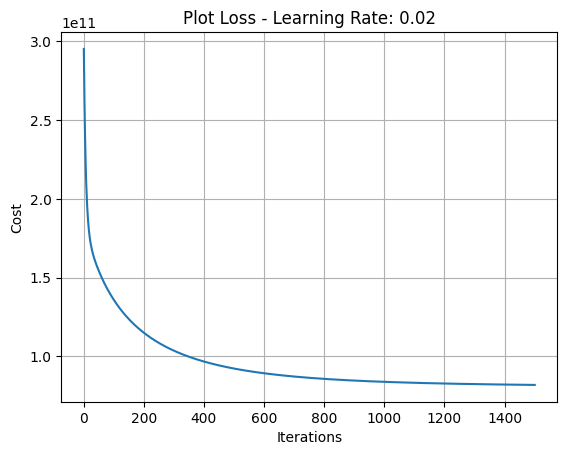

In [46]:
model.plot_cost()

Observation of final weights and bias

In [47]:
model.weights

array([-152201.88494324,  544545.56204128,  480857.42935327,
       -185486.93323821,  279608.97146206,    6111.57300059,
         -2959.72353151,  -69541.69422478,   88414.57913682,
       -566939.84289044,  -38790.37243867,  -56938.85147825,
         16570.96019746,  -72044.73104369])

In [48]:
model.bias

447491.8053942296

Comparison with scikit-learn lineer regression model

In [49]:
from sklearn.linear_model import LinearRegression as LN

In [50]:
model2 = LN()

In [51]:
model2.fit(X_train,y_train)

LinearRegression()

In [52]:
predictions2 = model2.predict(X_test)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
print(mean_squared_error(predictions2,y_test))

196442800474.58777


In [55]:
print(r2_score(y_test,predictions2))

0.3976966801044368
